In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set_palette("colorblind")
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.linear_model import LinearRegression

In [35]:
selected_cbg_brand = pd.read_csv('selected_cbg_brand.csv', index_col = 'cbg')
selected_cbg_stats = pd.read_csv('selected_cbg_stats.csv')
selected_cbg_income = pd.read_csv('selected_cbg_income.csv')

## lasso regression predicting income

In [60]:
X = selected_cbg_brand.div(selected_cbg_brand.sum(axis=1), axis=0)
y = selected_cbg_income['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [61]:
lasso = LassoCV().fit(X_train, y_train)
pred = lasso.predict(X_test)
predtr = lasso.predict(X_train)

In [62]:
print("correlation between predicted vs actual in test set", stats.pearsonr(pred, y_test))
print("correlation between predicted vs actual in training set", stats.pearsonr(predtr, y_train))

correlation between predicted vs actual in test set PearsonRResult(statistic=0.7476561224522645, pvalue=0.0)
correlation between predicted vs actual in training set PearsonRResult(statistic=0.7684532788055632, pvalue=0.0)


In [63]:
# R-squared for training set
lasso.score(X_train, y_train)

0.5898344661467876

In [64]:
lasso.alpha_

0.7326613482658617

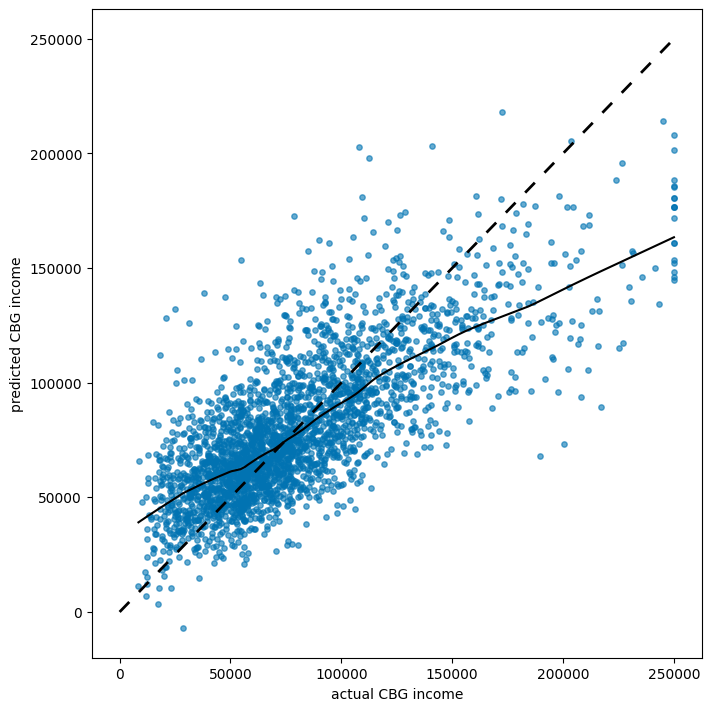

In [42]:
plt.figure(figsize=(7, 7), constrained_layout=True)

plt.xlabel("actual CBG income")
plt.ylabel("predicted CBG income")

x = y_test
y = pred
plt.scatter(x, y, s = 15, alpha = 0.6)

lowess_x, lowess_y = lowess(y, x, 0.2).T

plt.plot(list(range(250000)), list(range(250000)), "--",color = "black", linewidth = 2, dashes=(5, 5))
plt.plot(lowess_x, lowess_y, color = "black")

plt.show()
# plt.savefig('Appendix/FigureB1.png', dpi = 300)

In [43]:
sum(lasso.coef_ != 0)

355

In [44]:
df = pd.DataFrame({"brands": selected_cbg_brand.columns.values, "coef": lasso.coef_})
df = df[df["coef"] != 0]

In [45]:
list(df.sort_values('coef').head(10)['brands'])

['iFresh Market',
 'Net Cost Market',
 'Kmart',
 'Showcase Cinemas',
 "Jet's Pizza",
 'Jimmy Jazz',
 "Jimmy John's",
 'Vivi Bubble Tea',
 'Krispy Kreme Doughnuts',
 'YWCA']

In [46]:
df.sort_values('coef').tail(10)

,brands,coef
393,Hermès,4.741234e+05
96,Benihana,4.795172e+05
594,PGA TOUR Superstore,4.930144e+05
108,Bloomingdale's,5.267737e+05
832,Tropical Smoothie Café,5.518511e+05
886,Whole Foods Market,6.182782e+05
493,Lord and Taylor,6.795133e+05
494,Loro Piana,8.899401e+05
488,Lifetime Fitness,1.050059e+06
47,Anthony's Coal Fired Pizza,1.051556e+06
